In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

In [2]:
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 12,
                     'axes.labelsize': 18,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

# This notebook shows the flocking phase transition with respect to the noise level 

### An individual bird $i$ at position $r_{i}(t)$ propelling with a speed $v_{0}$ in the direction defined by the angle $\Theta_{i}(t)$ at time $t$ changes its direction to align with its neighbours within a distance $r$. 
### The dynamics is governed by the following 2 equations:

### (1) $\Theta_{i}(t+dt) = \langle \Theta_{j} \rangle _{|r_{i} - r_{j}|<r} + \eta $
### (2) $ r_{i}(t + dt) = r_{i}(t) + v_{0} \cdot dt \cdot \begin{bmatrix} \cos \Theta_{i}(t) \\ \sin \Theta_{i}(t) \end{bmatrix} $

### where $\eta$ is the uncertainty due to noise

In [192]:
#Define configuration
L = 50
rho_N = 0.8 #number density of agents
N = int(rho_N*(L**2)) #number of agents in the defined 2D space
eta = 0.12
roi = 2
#dt = 0.01 #time step
dt = 1
velocity = 0.8 #propulsion velocity

In [193]:
#initialise the agent coordinates and orientations
#positions_x = np.random.uniform(0,L,N)
#positions_y = np.random.uniform(0,L,N)
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

In [194]:
def get_neighbours(x0,y0,positions,roi):
    ##Returns ids (index) of all neighbours within radius of influence of the particle 
    noi = [] #neighbours of influence
    for i,(x,y) in enumerate(positions):
        distance = np.sqrt((x-x0)**2 + (y-y0)**2)
        if distance < roi:
            noi.append(i)
    return(noi)

In [195]:
def get_avg_unit_vector(noi,orientations):
    unit_vec_list = []
    for i in noi:
        theta = orientations[i]
        vec = np.array([np.cos(theta),np.sin(theta)])
        mag = np.sqrt(vec[0]**2 + vec[1]**2)
        unit_vec = vec/mag
        unit_vec_list.append(unit_vec)
    avg_unit_vec = np.mean(np.array(unit_vec_list),axis=0)
    return(avg_unit_vec)

## Evolution of global order over time 

In [199]:
global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:36<00:00,  5.53s/it]


# Change of order parameter over time

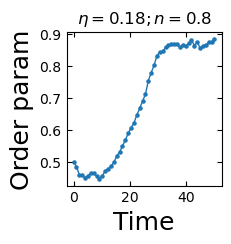

In [208]:
time = np.linspace(0,total_steps,total_steps)
plt.figure(figsize=(2,2))
plt.scatter(time, global_order_parameter,s=5)
plt.plot(time, global_order_parameter)
plt.xlabel('Time')
plt.ylabel('Order param')
plt.title('$\eta=0.18; n=0.8 $')
plt.savefig('Evolution of order param.pdf', bbox_inches='tight')
plt.savefig('Evolution of order param.png', bbox_inches='tight')

# Influence of noise $\eta$

In [164]:
#Define common configuration parameters
L = 50
rho_N = 0.8 #number density of agents
N = int(rho_N*(L**2)) #number of agents in the defined 2D space
#eta = 0.12 #noise intensity
#eta = 0.12
roi = 2
#dt = 0.01 #time step
dt = 1
velocity = 0.8 #propulsion velocity

In [165]:
#eta_values = [0.1,0.2,0.3,0.4,0.5,0.6]
eta_values = [0.1,0.15,0.2,0.25,0.3,0.35]
global_order_parameter_all = []

In [166]:
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

eta = eta_values[0]

global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)
    
global_order_parameter_all.append(global_order_parameter)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:34<00:00,  5.48s/it]


In [167]:
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

eta = eta_values[1]

global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)
    
global_order_parameter_all.append(global_order_parameter)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:33<00:00,  5.47s/it]


In [168]:
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

eta = eta_values[2]

global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)
    
global_order_parameter_all.append(global_order_parameter)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:33<00:00,  5.47s/it]


In [169]:
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

eta = eta_values[3]

global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)
    
global_order_parameter_all.append(global_order_parameter)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:50<00:00,  5.82s/it]


In [170]:
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

eta = eta_values[4]

global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)
    
global_order_parameter_all.append(global_order_parameter)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:50<00:00,  5.80s/it]


In [171]:
positions = np.random.uniform(0,L,size=(N,2))
orientations = np.random.uniform(-np.pi,np.pi,N)
velocities = np.random.uniform(0,L,size=(N,2)) #velocity vectors

eta = eta_values[5]

global_order_parameter = []

total_steps = 50

for f in tqdm(range(total_steps)):
    for i,(xi,yi) in enumerate(positions):
        neighbours = get_neighbours(xi,yi,positions,roi)
        avg_unit_vector = get_avg_unit_vector(neighbours,orientations)
        noise_vector = eta*np.random.uniform(-np.pi,np.pi,2)

        #new orientation
        new_orientation_vec = avg_unit_vector + noise_vector
        
        #compute new position
        positions[i,:] += (new_orientation_vec)*dt*velocity
        velocities[i,:] = (new_orientation_vec)*velocity # velocity vectors

        #compute new orientation
        orientations[i] = math.atan2(new_orientation_vec[1],new_orientation_vec[0]) #convert orientation vector into orientation angle

    #implement periodic boundary condition
    positions[positions>L] -= L
    positions[positions<0] += L

    #compute global order parameter
    velocities_mean = np.mean(velocities,axis=0) #average over different particles
    velocities_mean = (np.sqrt(velocities_mean[0]**2 + velocities_mean[1]**2))/(velocity) #compute the magnitude and normalise
    global_order_parameter.append(velocities_mean)
    
global_order_parameter_all.append(global_order_parameter)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:02<00:00,  6.06s/it]


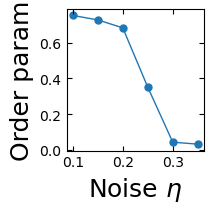

In [206]:
global_order_parameters_final = [global_order_parameter_all[0][-1],global_order_parameter_all[1][-1],global_order_parameter_all[2][-1],
         global_order_parameter_all[3][-1],global_order_parameter_all[4][-1],global_order_parameter_all[5][-1]]

plt.figure(figsize=(2.3,2.3))
plt.scatter(eta_values, global_order_parameters_final,s=25)
plt.plot(eta_values, global_order_parameters_final)
plt.xlabel('Noise $\eta$')
plt.ylabel('Order param')
plt.tight_layout()
plt.savefig('Order param with noise.pdf', bbox_inches='tight')
plt.savefig('Order param with noise.png', bbox_inches='tight')

C:\Users\desmo\AppData\Local\Temp\ipykernel_17620\397586755.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


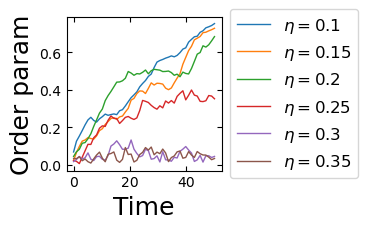

In [207]:
plt.figure(figsize=(2,2))
plt.plot(time, global_order_parameter_all[0], label='$\eta=0.1$')
plt.plot(time, global_order_parameter_all[1], label='$\eta=0.15$')
plt.plot(time, global_order_parameter_all[2], label='$\eta=0.2$')
plt.plot(time, global_order_parameter_all[3], label='$\eta=0.25$')
plt.plot(time, global_order_parameter_all[4], label='$\eta=0.3$')
plt.plot(time, global_order_parameter_all[5], label='$\eta=0.35$')
plt.xlabel('Time')
plt.ylabel('Order param')
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('Evolution of order param for different noise.pdf', bbox_inches='tight')
plt.savefig('Evolution of order param for different noise.png', bbox_inches='tight')